In [1]:
import os

import h5py
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
import seaborn as sns
sns.set_context('notebook')

import sklearn
from sklearn import datasets
from sklearn.metrics.pairwise import pairwise_kernels
import graphtools
#from pydiffmap.diffusion_map import DiffusionMap
import phate

os.chdir('..')
from graph_utils import get_graph_representation, plot_graph, get_groups_from_graph
import manifold_methods
import plotting
import mappings
import data_loader

Load data

In [2]:
df = pd.read_csv('phate_1000G_data.csv', sep=',')

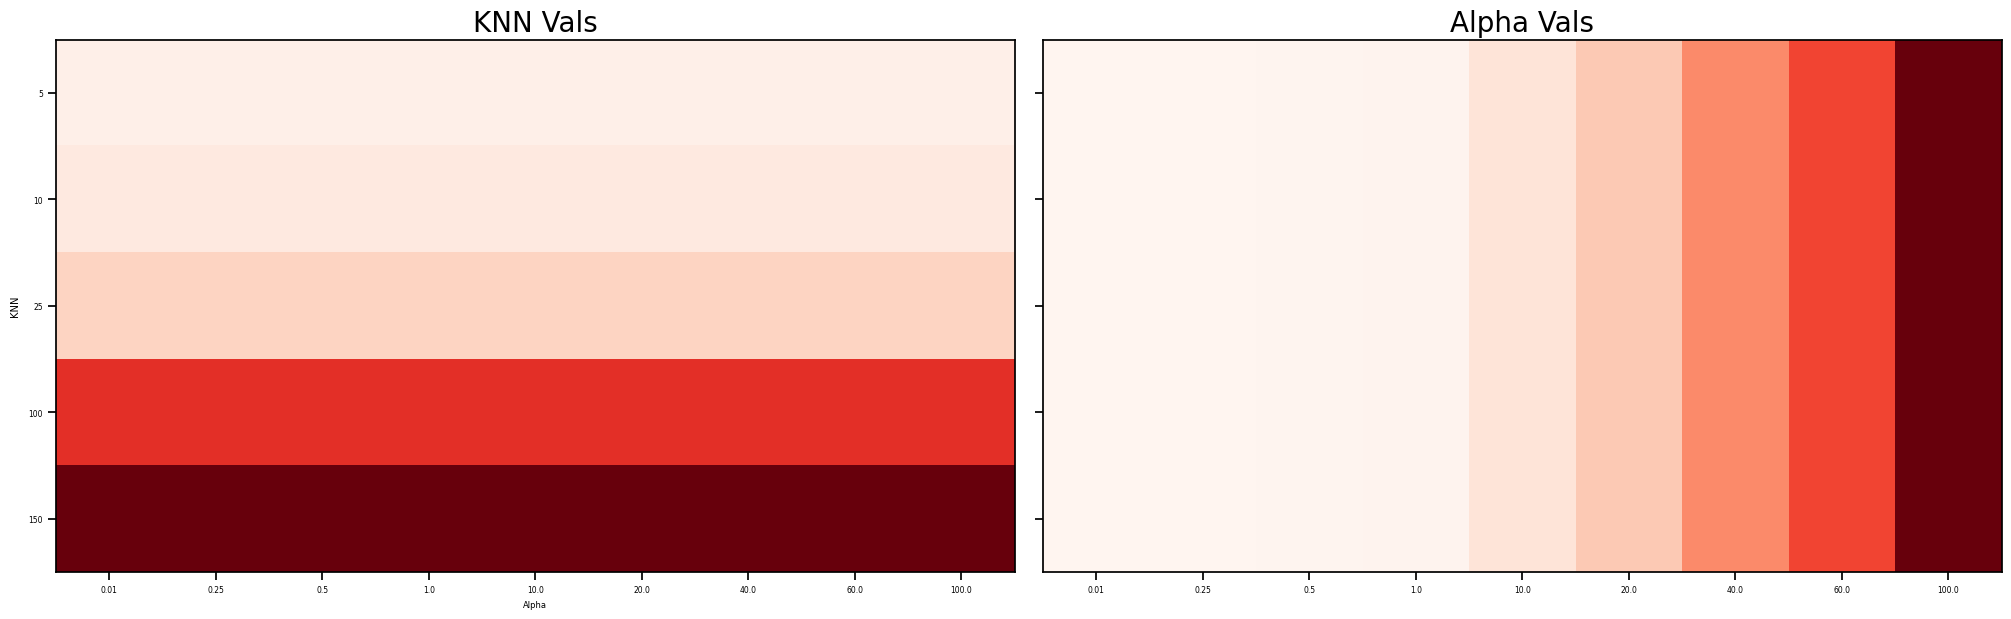

In [3]:
to_plot = df[df['t'] == '1']

fig, ax = plt.subplots(ncols=2, figsize=(20,10), 
                       layout='constrained',
                       sharex=True, 
                       sharey=True)

ax[0].imshow(to_plot['knn'].values.reshape(5,-1), cmap='Reds', vmin=0, vmax=to_plot['knn'].max())
ax[1].imshow(to_plot['alpha'].values.reshape(5,-1), cmap='Reds', vmin=0, vmax=to_plot['alpha'].max())

_ = ax[0].set_xlabel('Alpha')
_ = ax[0].set_xticks(np.arange(len(np.unique(to_plot['alpha']))))
_ = ax[0].set_xticklabels(np.unique(to_plot['alpha']))

#fig.supxlabel('KNN')
fig.supylabel('KNN')
_ = ax[0].set_yticks(np.arange(len(np.unique(to_plot['knn']))))
_ = ax[0].set_yticklabels(np.unique(to_plot['knn']))

_ = ax[0].set_title('KNN Vals', size=20)
_ = ax[1].set_title('Alpha Vals', size=20)

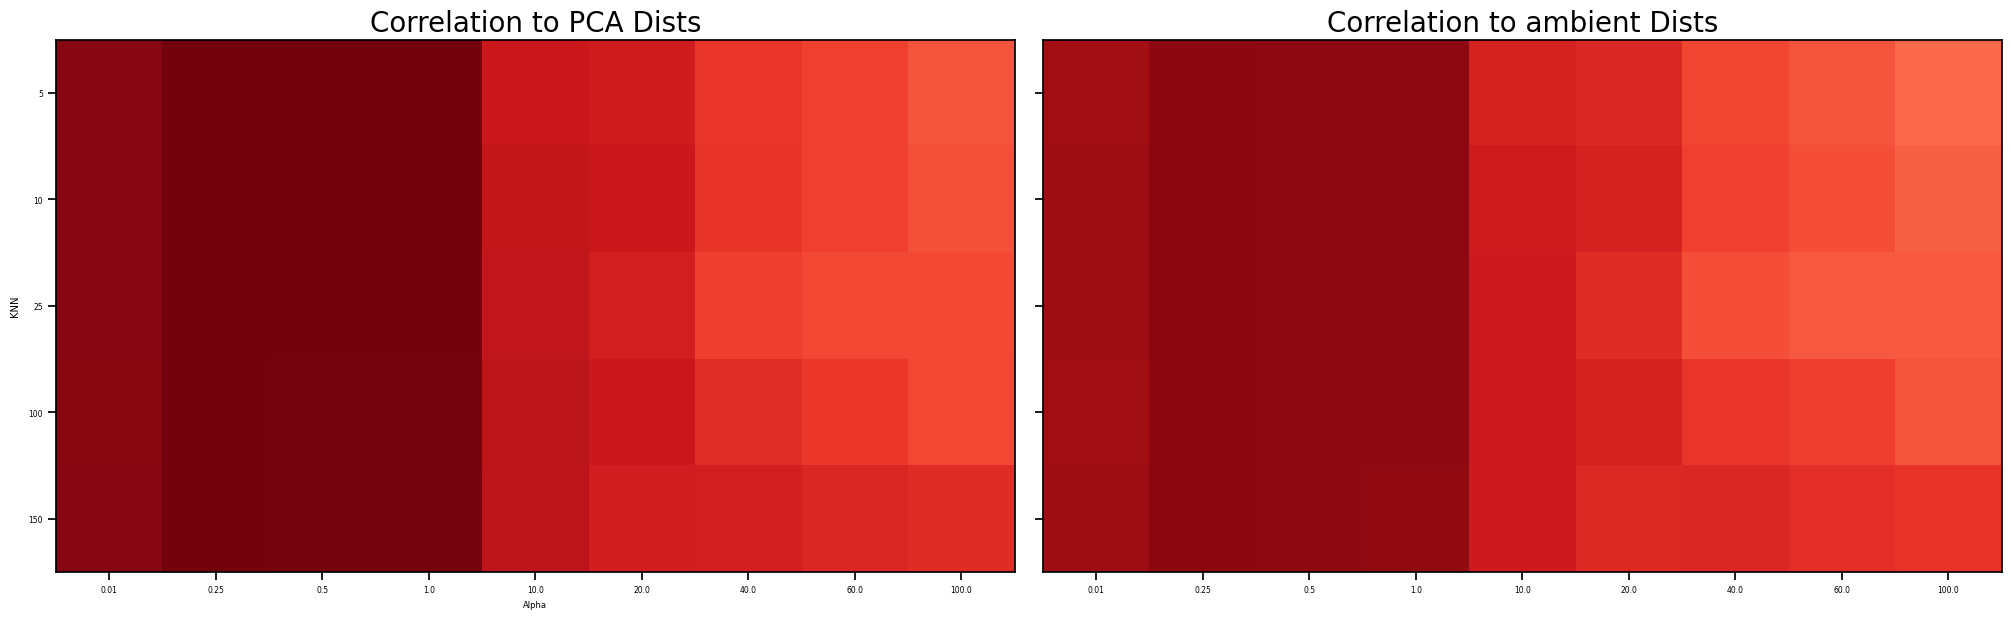

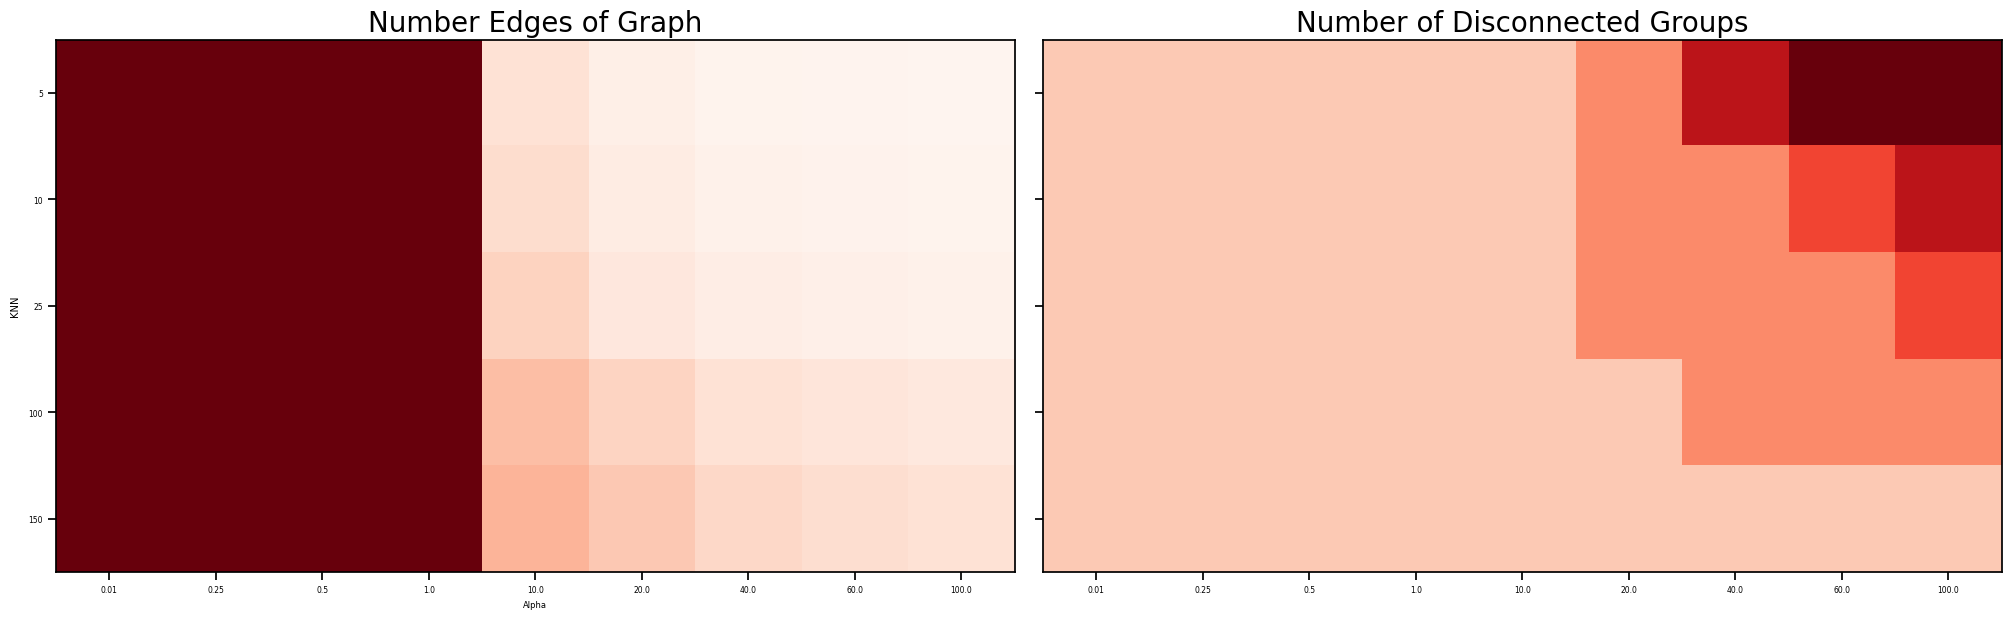

In [4]:
to_plot = df[df['t'] == '1']

fig, ax = plt.subplots(ncols=2, figsize=(20,10), 
                       layout='constrained',
                       sharex=True, 
                       sharey=True)

ax[0].imshow(to_plot['pca_dist_corrs'].values.reshape(5,-1), cmap='Reds', vmin=0, vmax=1)
ax[1].imshow(to_plot['amb_dist_corrs'].values.reshape(5,-1), cmap='Reds', vmin=0, vmax=1)

_ = ax[0].set_xlabel('Alpha')
_ = ax[0].set_xticks(np.arange(len(np.unique(to_plot['alpha']))))
_ = ax[0].set_xticklabels(np.unique(to_plot['alpha']))
#fig.supxlabel('KNN')
fig.supylabel('KNN')
_ = ax[0].set_yticks(np.arange(len(np.unique(to_plot['knn']))))
_ = ax[0].set_yticklabels(np.unique(to_plot['knn']))

_ = ax[0].set_title('Correlation to PCA Dists', size=20)
_ = ax[1].set_title('Correlation to ambient Dists', size=20)

fig, ax = plt.subplots(ncols=2, figsize=(20,10), 
                       layout='constrained',
                       sharex=True, 
                       sharey=True)

ax[0].imshow(to_plot['num_edges_graphs'].values.reshape(5,-1), cmap='Reds', vmin=0, vmax=df['num_edges_graphs'].max())
ax[1].imshow(to_plot['num_groups'].values.reshape(5,-1), cmap='Reds', vmin=0, vmax=df['num_groups'].max())

_ = ax[0].set_xlabel('Alpha')
_ = ax[0].set_xticks(np.arange(len(np.unique(to_plot['alpha']))))
_ = ax[0].set_xticklabels(np.unique(to_plot['alpha']))
#fig.supxlabel('KNN')
fig.supylabel('KNN')
_ = ax[0].set_yticks(np.arange(len(np.unique(to_plot['knn']))))
_ = ax[0].set_yticklabels(np.unique(to_plot['knn']))

_ = ax[0].set_title('Number Edges of Graph', size=20)
_ = ax[1].set_title('Number of Disconnected Groups', size=20)

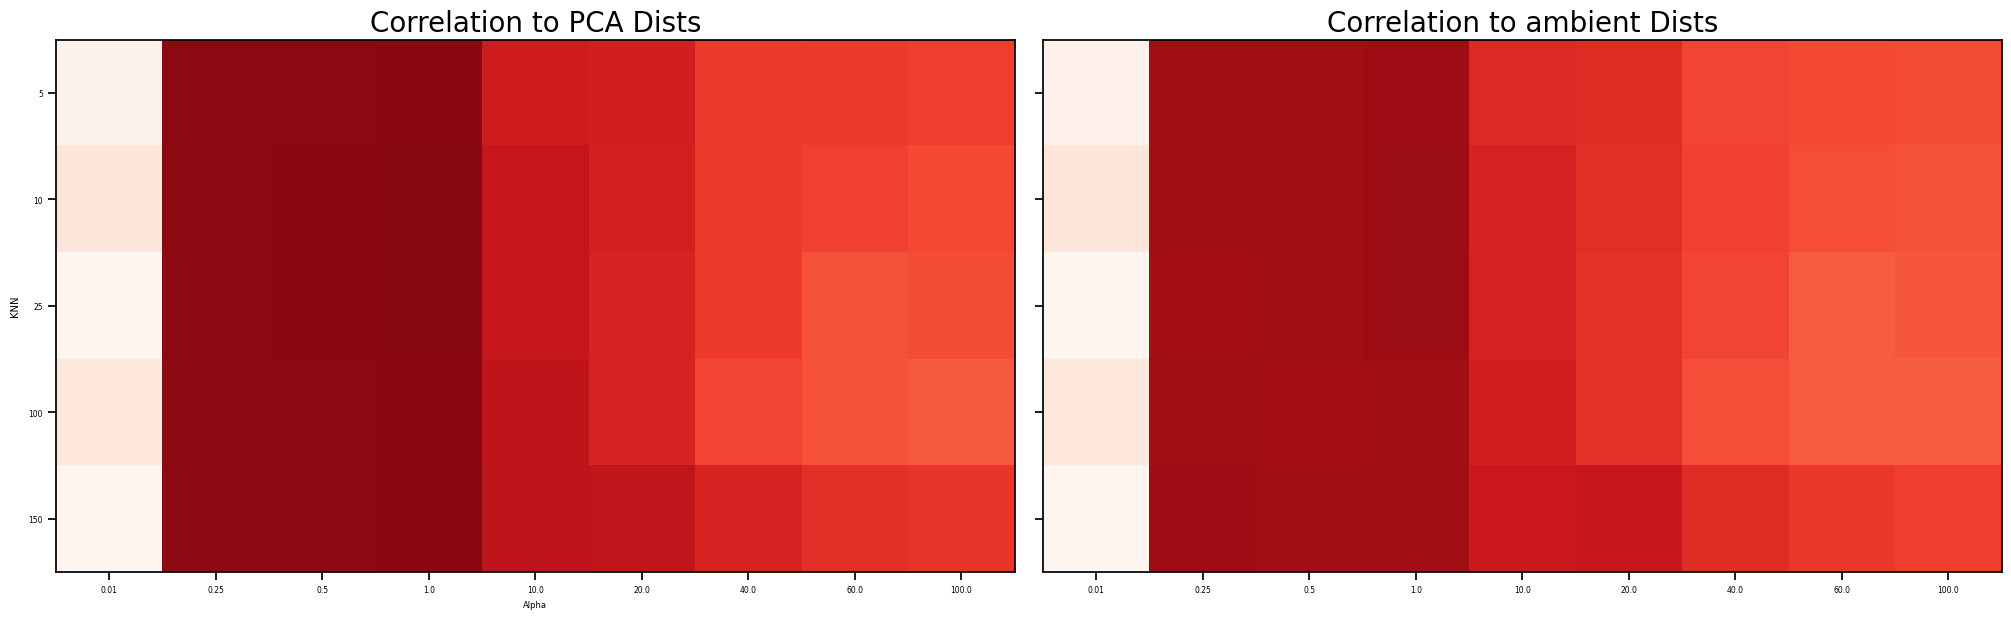

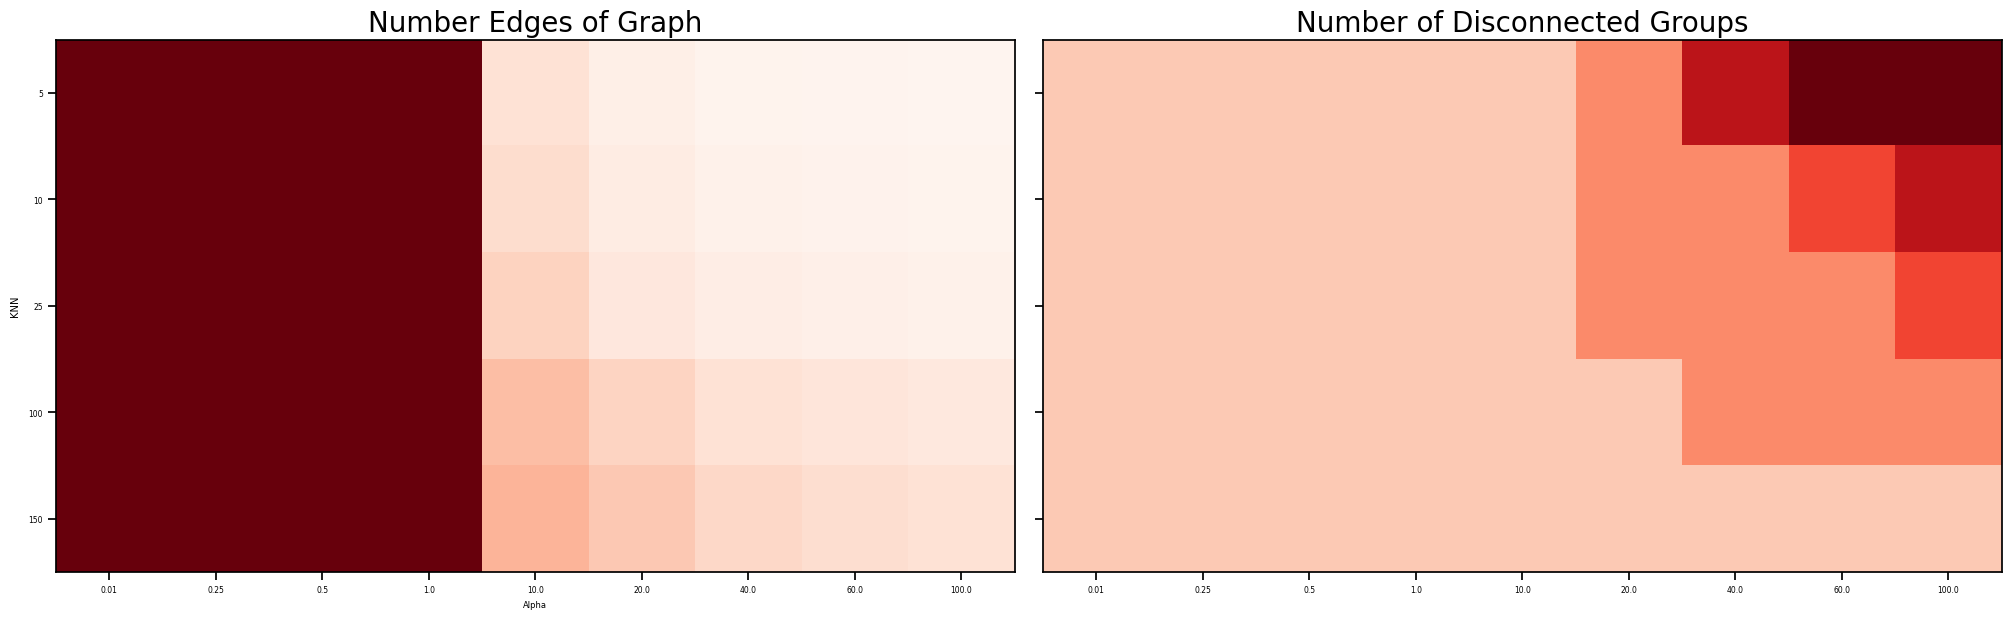

In [5]:
to_plot = df[df['t'] == '5']

fig, ax = plt.subplots(ncols=2, figsize=(20,10), 
                       layout='constrained',
                       sharex=True, 
                       sharey=True)

ax[0].imshow(to_plot['pca_dist_corrs'].values.reshape(5,-1), cmap='Reds', vmin=0, vmax=1)
ax[1].imshow(to_plot['amb_dist_corrs'].values.reshape(5,-1), cmap='Reds', vmin=0, vmax=1)

_ = ax[0].set_xlabel('Alpha')
_ = ax[0].set_xticks(np.arange(len(np.unique(to_plot['alpha']))))
_ = ax[0].set_xticklabels(np.unique(to_plot['alpha']))
#fig.supxlabel('KNN')
fig.supylabel('KNN')
_ = ax[0].set_yticks(np.arange(len(np.unique(to_plot['knn']))))
_ = ax[0].set_yticklabels(np.unique(to_plot['knn']))
_ = ax[0].set_title('Correlation to PCA Dists', size=20)
_ = ax[1].set_title('Correlation to ambient Dists', size=20)

fig, ax = plt.subplots(ncols=2, figsize=(20,10), 
                       layout='constrained',
                       sharex=True, 
                       sharey=True)

ax[0].imshow(to_plot['num_edges_graphs'].values.reshape(5,-1), cmap='Reds', vmin=0, vmax=df['num_edges_graphs'].max())
ax[1].imshow(to_plot['num_groups'].values.reshape(5,-1), cmap='Reds', vmin=0, vmax=df['num_groups'].max())
_ = ax[0].set_title('Correlation to PCA Dists', size=20)
_ = ax[1].set_title('Correlation to ambient Dists', size=20)

_ = ax[0].set_xlabel('Alpha')
_ = ax[0].set_xticks(np.arange(len(np.unique(to_plot['alpha']))))
_ = ax[0].set_xticklabels(np.unique(to_plot['alpha']))
#fig.supxlabel('KNN')
fig.supylabel('KNN')
_ = ax[0].set_yticks(np.arange(len(np.unique(to_plot['knn']))))
_ = ax[0].set_yticklabels(np.unique(to_plot['knn']))
_ = ax[0].set_title('Number Edges of Graph', size=20)
_ = ax[1].set_title('Number of Disconnected Groups', size=20)

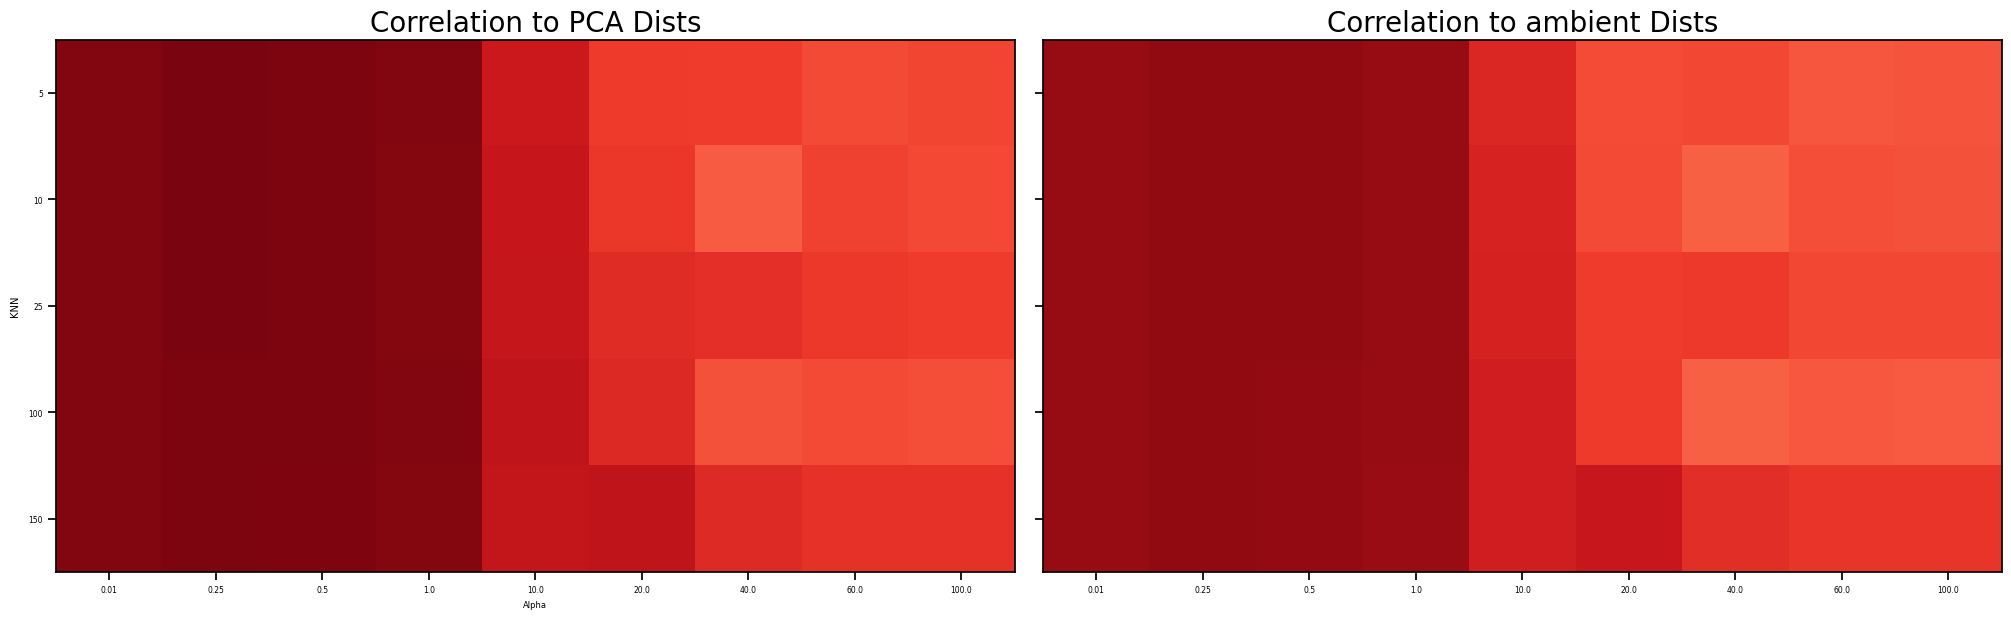

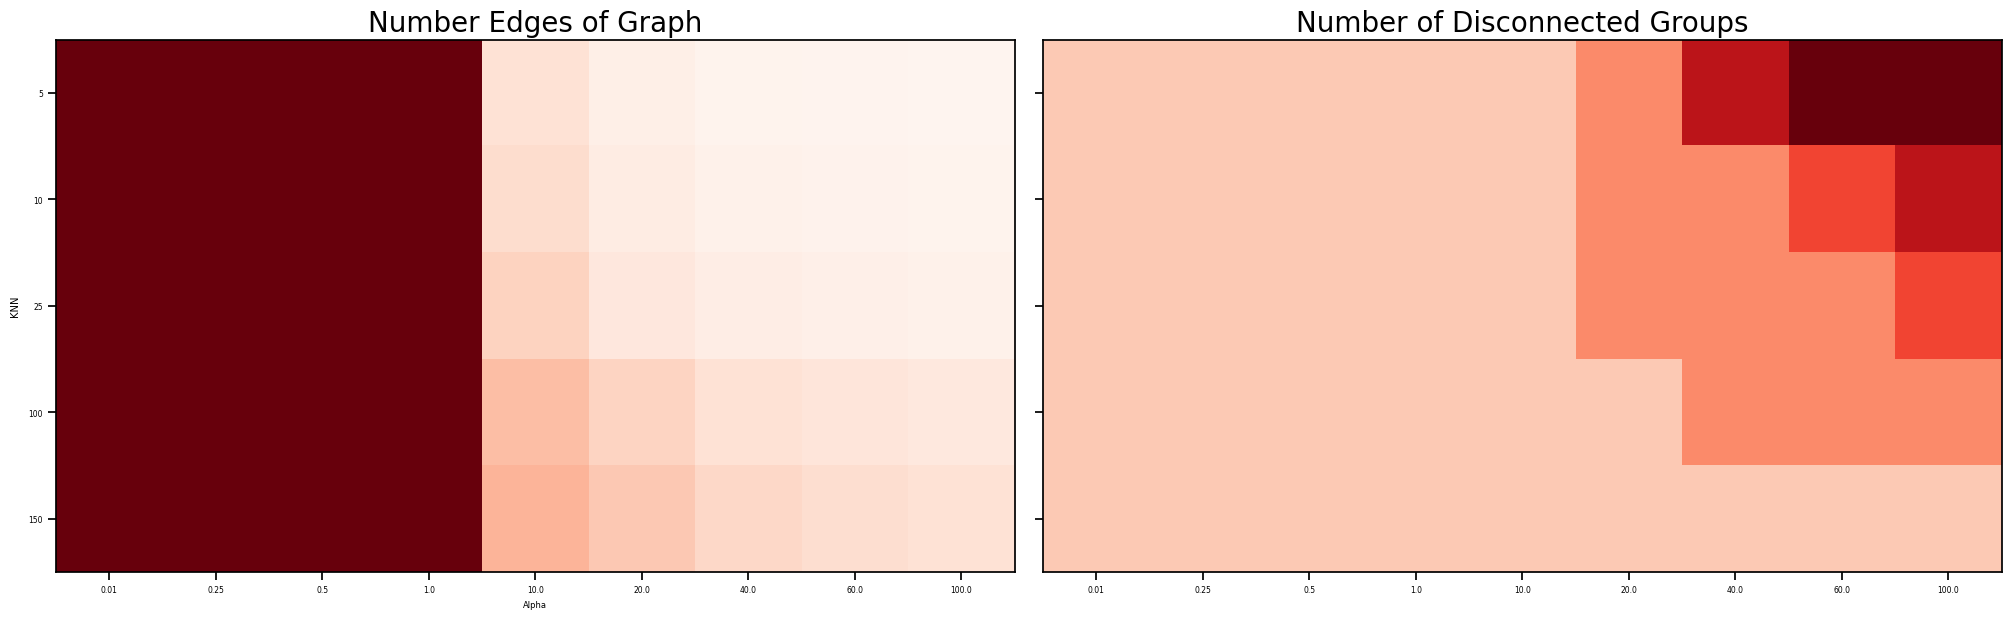

In [6]:
to_plot = df[df['t'] == 'auto']

fig, ax = plt.subplots(ncols=2, figsize=(20,10), 
                       layout='constrained',
                       sharex=True, 
                       sharey=True)

ax[0].imshow(to_plot['pca_dist_corrs'].values.reshape(5,-1), cmap='Reds', vmin=0, vmax=1)
ax[1].imshow(to_plot['amb_dist_corrs'].values.reshape(5,-1), cmap='Reds', vmin=0, vmax=1)

_ = ax[0].set_xlabel('Alpha')
_ = ax[0].set_xticks(np.arange(len(np.unique(to_plot['alpha']))))
_ = ax[0].set_xticklabels(np.unique(to_plot['alpha']))
#fig.supxlabel('KNN')
fig.supylabel('KNN')
_ = ax[0].set_yticks(np.arange(len(np.unique(to_plot['knn']))))
_ = ax[0].set_yticklabels(np.unique(to_plot['knn']))
_ = ax[0].set_title('Correlation to PCA Dists', size=20)
_ = ax[1].set_title('Correlation to ambient Dists', size=20)

fig, ax = plt.subplots(ncols=2, figsize=(20,10), 
                       layout='constrained',
                       sharex=True, 
                       sharey=True)

ax[0].imshow(to_plot['num_edges_graphs'].values.reshape(5,-1), cmap='Reds', vmin=0, vmax=df['num_edges_graphs'].max())
ax[1].imshow(to_plot['num_groups'].values.reshape(5,-1), cmap='Reds', vmin=0, vmax=df['num_groups'].max())
_ = ax[0].set_title('Correlation to PCA Dists', size=20)
_ = ax[1].set_title('Correlation to ambient Dists', size=20)

_ = ax[0].set_xlabel('Alpha')
_ = ax[0].set_xticks(np.arange(len(np.unique(to_plot['alpha']))))
_ = ax[0].set_xticklabels(np.unique(to_plot['alpha']))
#fig.supxlabel('KNN')
fig.supylabel('KNN')
_ = ax[0].set_yticks(np.arange(len(np.unique(to_plot['knn']))))
_ = ax[0].set_yticklabels(np.unique(to_plot['knn']))
_ = ax[0].set_title('Number Edges of Graph', size=20)
_ = ax[1].set_title('Number of Disconnected Groups', size=20)

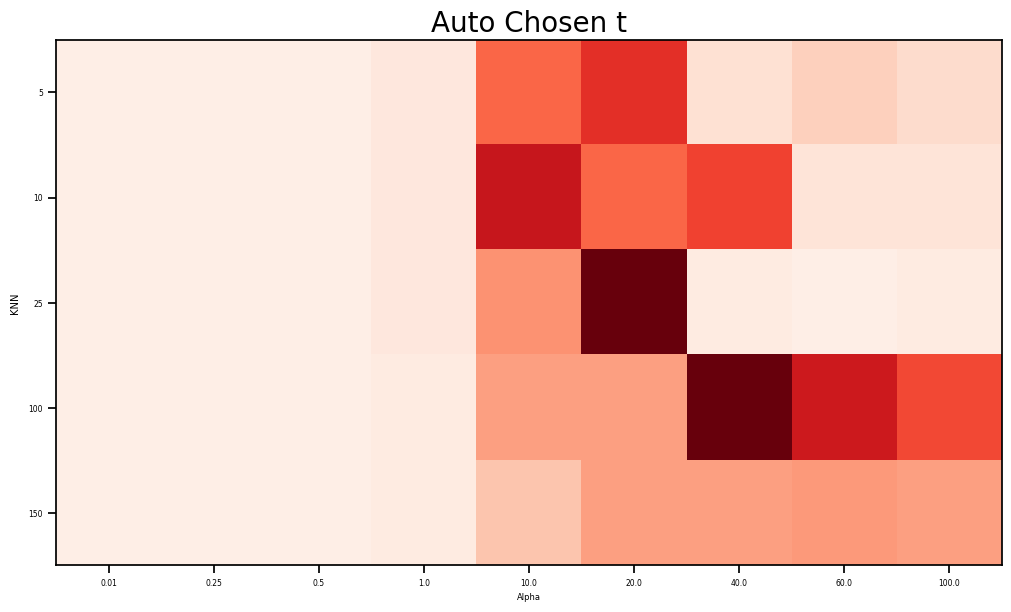

In [7]:
fig, ax = plt.subplots(figsize=(10,10), 
                       layout='constrained',
                       sharex=True, 
                       sharey=True)

ax.imshow(to_plot['t_auto_val'].values.reshape(5,-1), cmap='Reds', vmin=0, vmax=to_plot['t_auto_val'].max())

_ = ax.set_xlabel('Alpha')
_ = ax.set_xticks(np.arange(len(np.unique(to_plot['alpha']))))
_ = ax.set_xticklabels(np.unique(to_plot['alpha']))
#fig.supxlabel('KNN')
fig.supylabel('KNN')
_ = ax.set_yticks(np.arange(len(np.unique(to_plot['knn']))))
_ = ax.set_yticklabels(np.unique(to_plot['knn']))

_ = ax.set_title('Auto Chosen t', size=20)

## Look at some of these PHATE Embeddings

In [8]:
exp_path = '/lustre06/project/6065672/shared/DietNet/1KGB_POP24/1KGP/WGS30X_V1/oldnow/MattsPlace'
fname = '1000G.2504_WGS30x.GSA17k_MHI.intersectGSA.miss10perc.maf0.05.pruned.autosomes.noHLA.phased_imputed_V1.hdf5'

In [9]:
with h5py.File(os.path.join(exp_path, fname), 'r') as hf:
    #model_attrs = hf['gradients'][:]
    #print('loaded gradient of fc1 w.r.t. input from {}'.format(attr_fc1_saliency_name))
    inputs = hf['inputs'][:]
    class_label_names = hf['class_label_names'][:]
    class_labels = hf['class_labels'][:]
    samples = hf['samples'][:]
    snp_names = hf['snp_names'][:]

# make labels
label_with_names = [str(class_label_names[y])[2:-1] for y in class_labels]
class_label_names = [str(label)[2:-1] for label in class_label_names]
label_with_superpop_names = np.zeros_like(label_with_names)
for label in mappings.super_pops_1000G:
    index = pd.DataFrame(label_with_names).isin(mappings.super_pops_1000G[label]).values.flatten()
    label_with_superpop_names[index] = label

In [10]:
# For visualization of diffusion operator, will want to order by class!
new_order = []
labs_arr = np.array(label_with_names)
for lab in mappings.label_order_1000G_fine:
    new_order = new_order + np.arange(len(labs_arr))[lab == labs_arr].tolist()

In [11]:
def plot_embeddings_1000G_labels(emb, labels, palette, label_order, ax):

    sns.scatterplot(x=emb[:,0],
                    y=emb[:,1],
                    ax=ax,
                    palette=palette,
                    hue_order=label_order,
                    hue=pd.Categorical(labels))
    ax.legend(bbox_to_anchor=(1.1, 1.05), loc='upper left')

    for label in np.unique(labels):
        index = label == labels
        mean_pos = emb[index,:2].mean(0)
        ax.text(x=mean_pos[0], 
                y=mean_pos[1], 
                s=label)

In [12]:
pca_obj = sklearn.decomposition.PCA(n_components=100, random_state=42)
pca_input = pca_obj.fit_transform(inputs)

In [13]:
# KNN = 5, alpha = 1 (PCA-like)
phate_operator = phate.PHATE(random_state=42, n_pca=None, knn=5, decay=1, t=1)
phate_operator.fit(pca_input)
phate_emb = phate_operator.transform()

Running PHATE on 2322 observations and 100 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.32 seconds.
  Calculating affinities...
  Calculated affinities in 0.89 seconds.
Calculated graph and diffusion operator in 1.34 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 3.37 seconds.
  Calculating KMeans...
  Calculated KMeans in 1.24 seconds.
Calculated landmark operator in 21.53 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 0.02 seconds.
Calculating metric MDS...
Calculated metric MDS in 2.96 seconds.


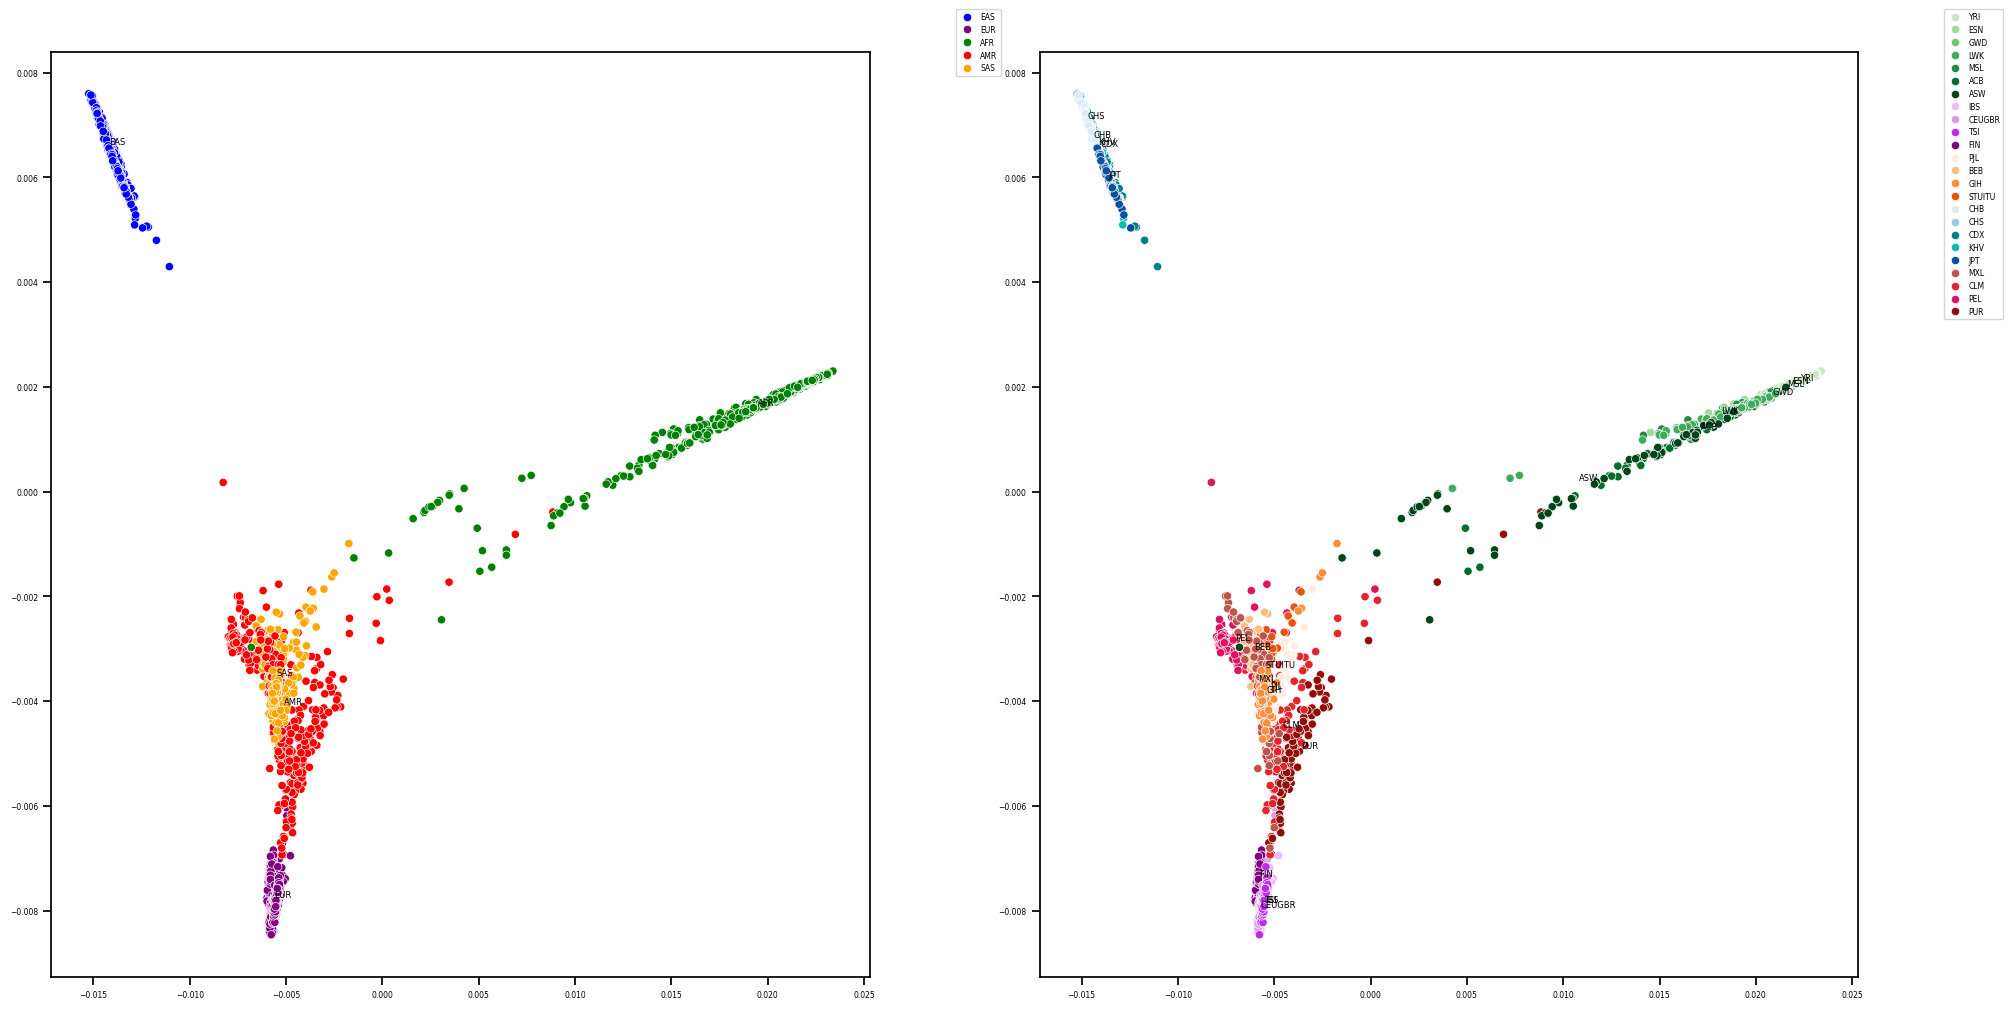

In [14]:
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
plot_embeddings_1000G_labels(phate_emb, 
                             np.array(label_with_superpop_names), 
                             mappings.pop_pallette_1000G_coarse,
                             mappings.label_order_1000G_coarse,
                             ax[0])
plot_embeddings_1000G_labels(phate_emb, 
                             np.array(label_with_names),
                             mappings.pop_pallette_1000G_fine,
                             mappings.label_order_1000G_fine,
                             ax[1])
plt.tight_layout()

In [15]:
# KNN = 5, alpha = 100 (top-right)
phate_operator = phate.PHATE(random_state=42, n_pca=None, knn=5, decay=100, t=1)
phate_operator.fit(pca_input)
phate_emb = phate_operator.transform()

Running PHATE on 2322 observations and 100 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.32 seconds.
  Calculating affinities...
  Calculated affinities in 0.01 seconds.
Calculated graph and diffusion operator in 0.34 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 0.10 seconds.
  Calculating KMeans...
  Calculated KMeans in 1.25 seconds.
Calculated landmark operator in 1.90 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 0.02 seconds.
Calculating metric MDS...
Calculated metric MDS in 2.99 seconds.


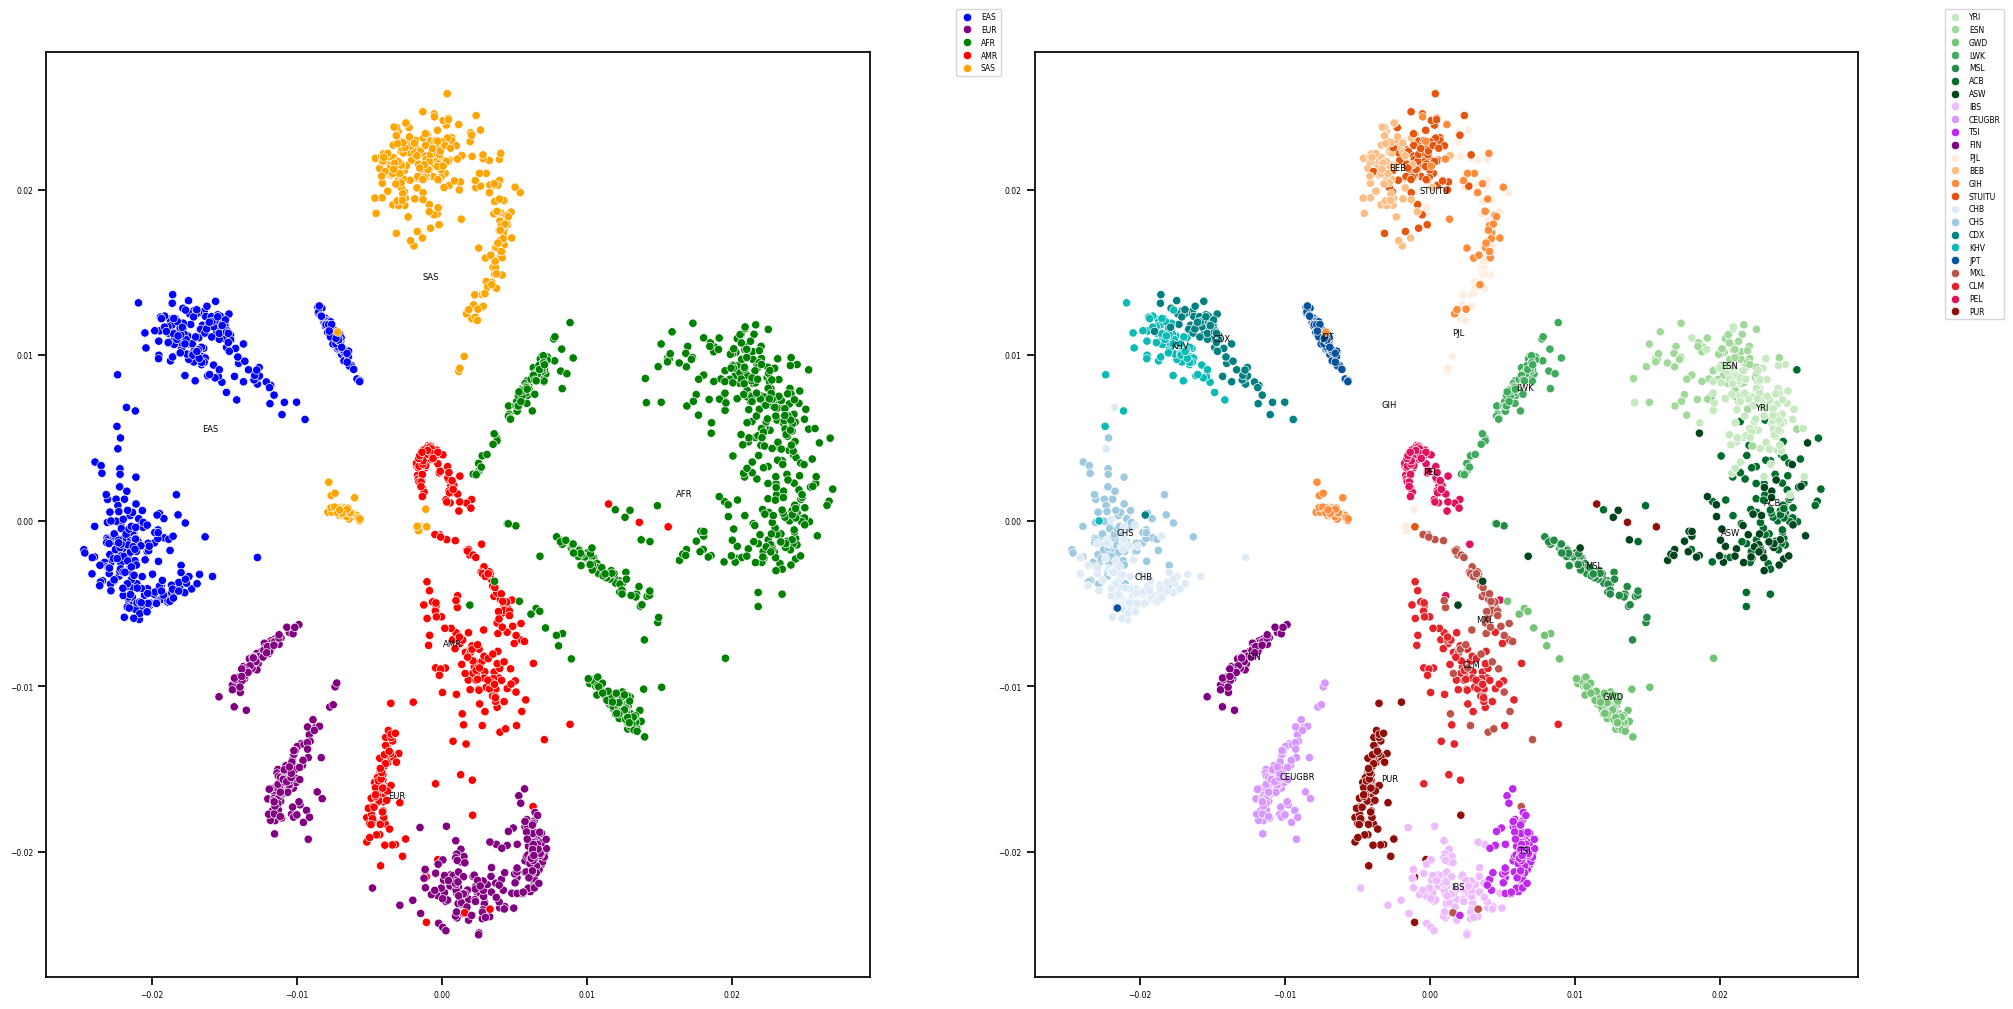

In [16]:
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
plot_embeddings_1000G_labels(phate_emb, 
                             np.array(label_with_superpop_names), 
                             mappings.pop_pallette_1000G_coarse,
                             mappings.label_order_1000G_coarse,
                             ax[0])
plot_embeddings_1000G_labels(phate_emb, 
                             np.array(label_with_names),
                             mappings.pop_pallette_1000G_fine,
                             mappings.label_order_1000G_fine,
                             ax[1])
plt.tight_layout()

In [17]:
# KNN = 5, alpha = 100 (top-right)
phate_operator = phate.PHATE(random_state=42, n_pca=None, knn=5, decay=100, t='auto')
phate_operator.fit(pca_input)
phate_emb = phate_operator.transform()

Running PHATE on 2322 observations and 100 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.32 seconds.
  Calculating affinities...
  Calculated affinities in 0.01 seconds.
Calculated graph and diffusion operator in 0.34 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 0.10 seconds.
  Calculating KMeans...
  Calculated KMeans in 1.25 seconds.
Calculated landmark operator in 1.90 seconds.
Calculating optimal t...
  Automatically selected t = 7
Calculated optimal t in 2.12 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 0.90 seconds.
Calculating metric MDS...
Calculated metric MDS in 3.01 seconds.


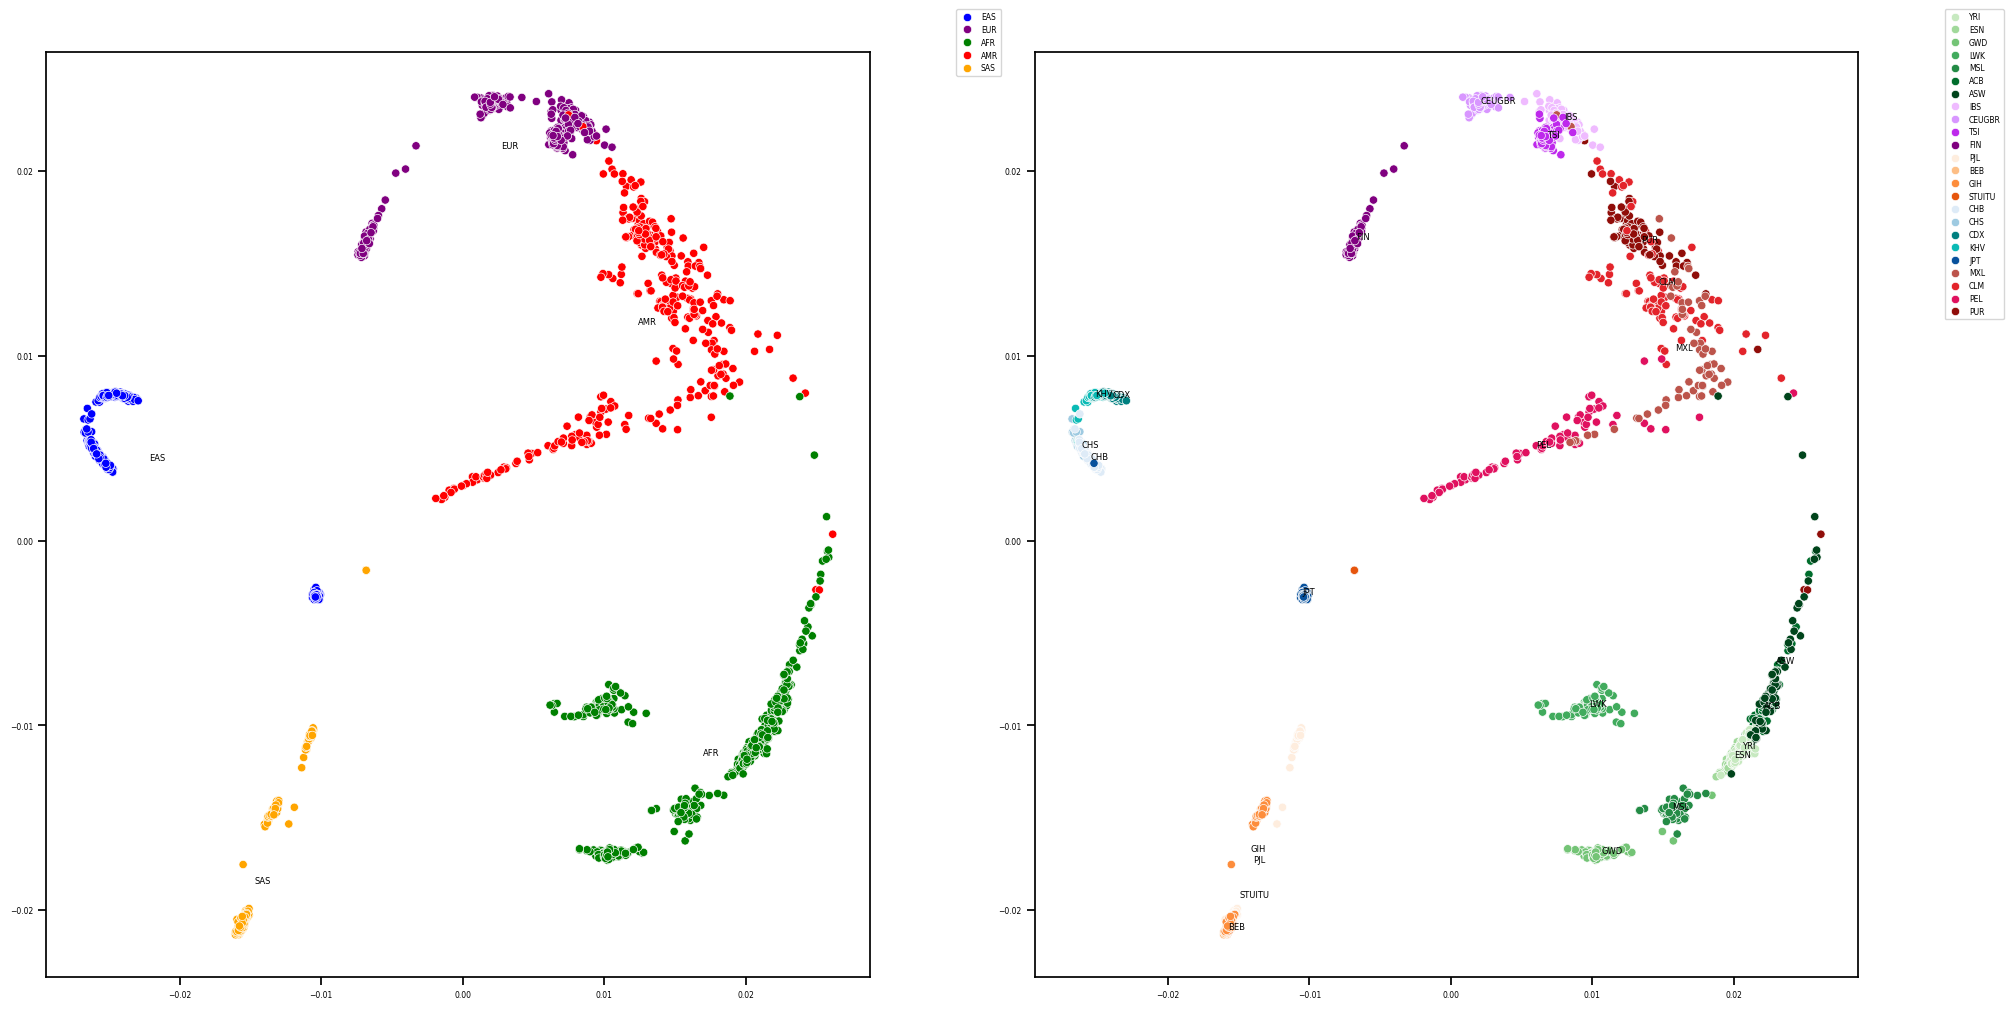

In [18]:
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
plot_embeddings_1000G_labels(phate_emb, 
                             np.array(label_with_superpop_names), 
                             mappings.pop_pallette_1000G_coarse,
                             mappings.label_order_1000G_coarse,
                             ax[0])
plot_embeddings_1000G_labels(phate_emb, 
                             np.array(label_with_names),
                             mappings.pop_pallette_1000G_fine,
                             mappings.label_order_1000G_fine,
                             ax[1])
plt.tight_layout()

## remove thres from PHATE

In [19]:
K = phate_operator.graph.K.todense()
K[K > 0].min() # thresholded

5.008069268317721e-05

In [20]:
phate_operator2 = phate.PHATE(random_state=42, n_pca=None, knn=5, decay=100, t='auto')
phate_operator2.fit(pca_input)

Running PHATE on 2322 observations and 100 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.32 seconds.
  Calculating affinities...
  Calculated affinities in 0.01 seconds.
Calculated graph and diffusion operator in 0.34 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 0.11 seconds.
  Calculating KMeans...
  Calculated KMeans in 1.24 seconds.
Calculated landmark operator in 1.90 seconds.


PHATE(decay=100, n_pca=None, random_state=42)

In [21]:
phate_operator2.graph = graphtools.Graph(
                    pca_input,
                    n_pca=None,
                    n_landmark=phate_operator2.n_landmark,
                    distance=phate_operator2.knn_dist,
                    precomputed=None,
                    knn=phate_operator2.knn,
                    knn_max=phate_operator2.knn_max,
                    decay=phate_operator2.decay,
                    thresh=0,
                    n_jobs=phate_operator2.n_jobs,
                    verbose=phate_operator2.verbose,
                    random_state=phate_operator2.random_state
                )

phate_operator2.diff_op
phate_emb2 = phate_operator2.transform()

Calculating affinities...
Calculated affinities in 0.32 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 0.56 seconds.
  Calculating KMeans...
  Calculated KMeans in 1.07 seconds.
Calculated landmark operator in 2.00 seconds.
Calculating optimal t...
  Automatically selected t = 34
Calculated optimal t in 1.92 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 1.31 seconds.
Calculating metric MDS...
Calculated metric MDS in 2.89 seconds.


In [22]:
K2 = phate_operator2.graph.K
K2[K2 > 0].min() # thresholded

5e-324

In [23]:
print(K[~np.isclose(K2, K)])
print(K2[~np.isclose(K2, K)])

[[0. 0. 0. ... 0. 0. 0.]]
[5.11637714e-08 3.03017462e-08 8.19964367e-08 ... 1.05382725e-06
 1.21369960e-05 3.30263958e-06]


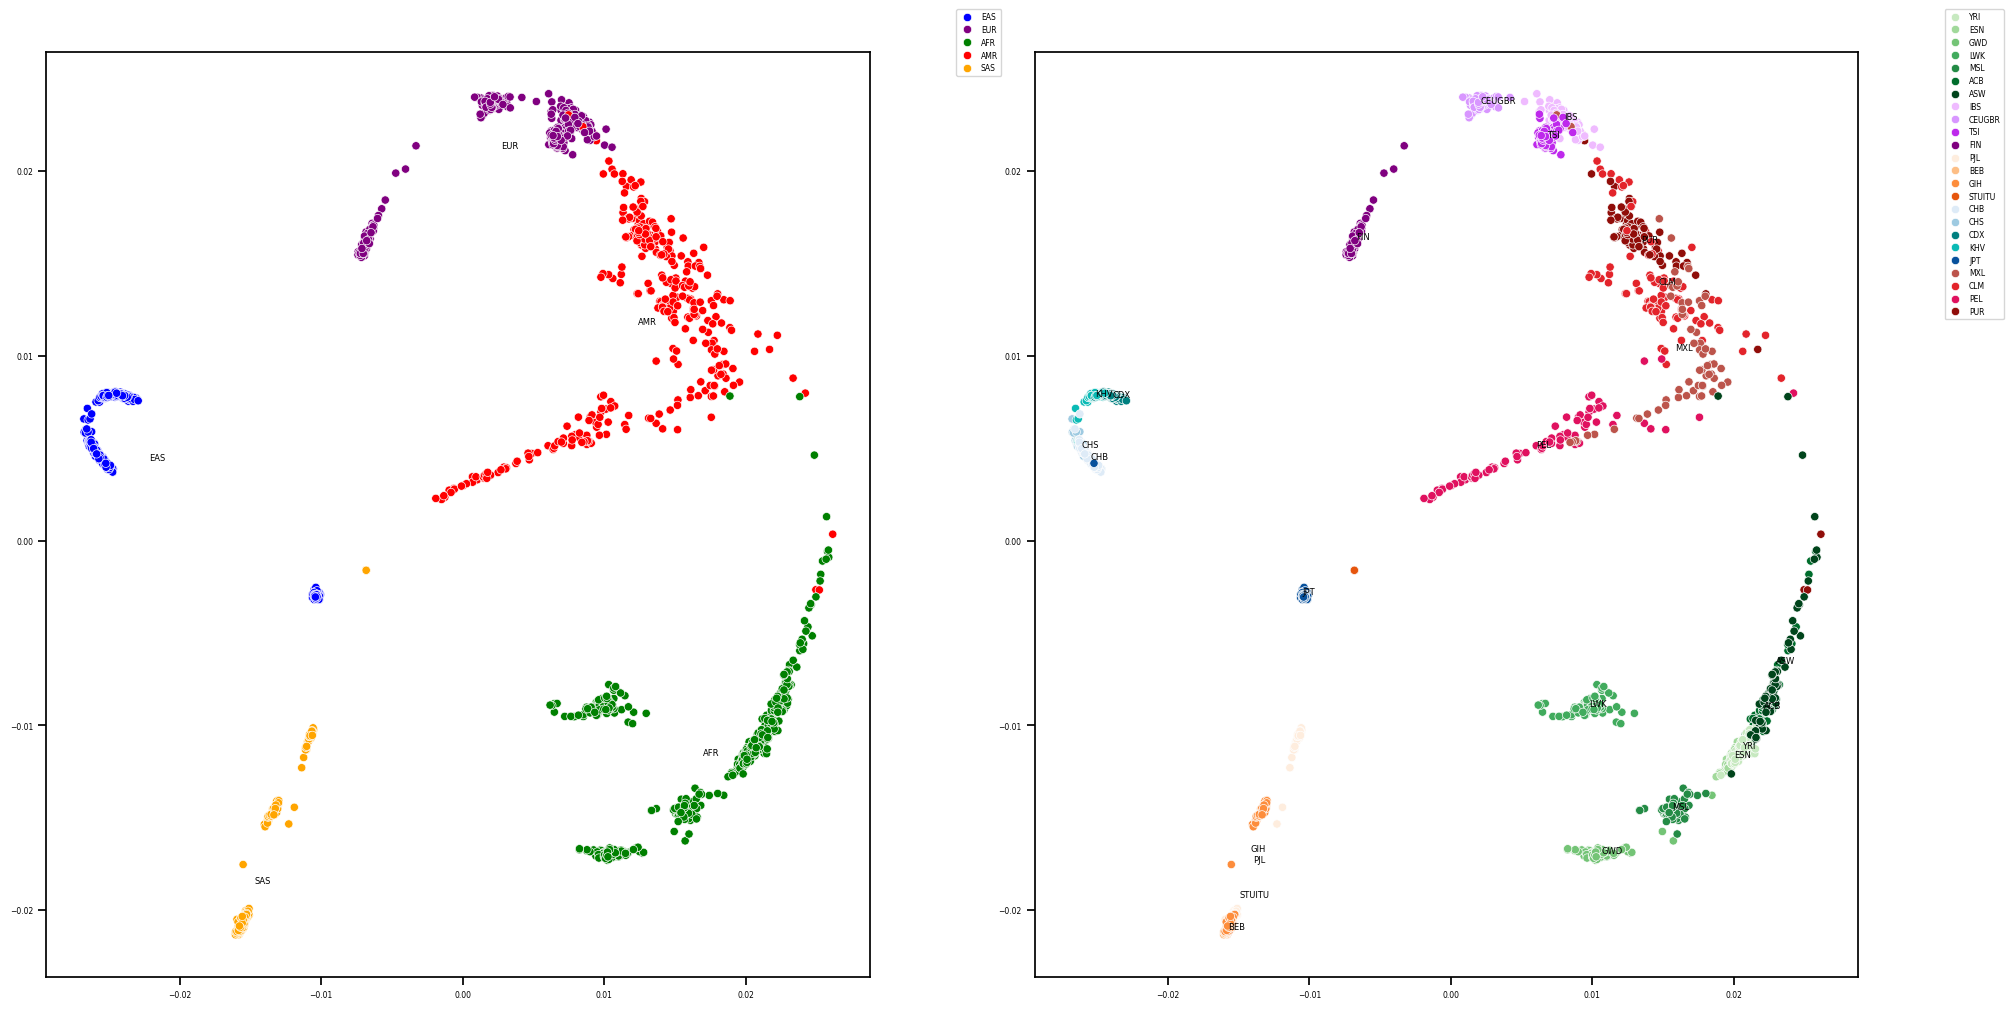

In [24]:
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
plot_embeddings_1000G_labels(phate_emb, 
                             np.array(label_with_superpop_names), 
                             mappings.pop_pallette_1000G_coarse,
                             mappings.label_order_1000G_coarse,
                             ax[0])
plot_embeddings_1000G_labels(phate_emb, 
                             np.array(label_with_names),
                             mappings.pop_pallette_1000G_fine,
                             mappings.label_order_1000G_fine,
                             ax[1])
plt.tight_layout()